In [1]:
import math
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
page_id = "cheche730"

path = 'post/'+page_id+'_post.csv'

In [3]:
data = pd.read_csv(path, encoding = 'utf8')

# 前亞視一姐平時出post講d乜?睇下先

In [4]:
data.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,203789756445700_916123725212296,2018 第一廠！🤣\r\n\r\n#綠茵闖蕩 #其實Eason嘅歌都係陪我哋成長,17/18 綠茵闖蕩 #37A - 賽事規管知多些 - 不小心策騎,video,https://www.facebook.com/203789756445700/posts...,2018-01-06 23:49:54,25,0,2,20,4,0,0,1,0
1,203789756445700_916049955219673,今日收穫好豐富！今年 #AIA友邦歐陸嘉年華2017 邀請咗25個嚟自世界各地嘅表演者組成雜...,Photos from 車車 cheche 張紫櫻's post,photo,https://www.facebook.com/203789756445700/posts...,2018-01-06 20:50:52,171,0,1,154,10,1,5,1,0
2,203789756445700_915577555266913,好多男人都愛車如命，話部車係佢老婆！睇完呢條片，我明哂～\r\n\r\n#愛車之人可以去到幾盡,Flow,video,https://www.facebook.com/203789756445700/posts...,2018-01-05 21:18:18,77,12,0,31,0,10,36,0,0
3,203789756445700_915119311979404,2018第一次開廠！\r\n\r\n#hkjc #workhard #綠茵闖蕩 #工作是快樂的,NaN,video,https://www.facebook.com/203789756445700/posts...,2018-01-04 23:06:01,79,6,3,56,4,2,16,1,0
4,203789756445700_913651018792900,無佢！我應該只係一個鍾意睇波嘅小Fans。\r\n無佢！我應該唔會喺電台開咪做足球節目。\r...,BF People & Life,video,https://www.facebook.com/203789756445700/posts...,2018-01-02 03:33:57,94,2,0,89,1,0,2,2,0


一姐出總共出左2710 post

In [5]:
len(data)

2710

In [6]:
data = data[(data['num_reactions']!=0) & (data['status_message'].notnull())].reindex()

刪左d有問題既post之後係有2604,即係有106個post係冇內容同冇人like

In [7]:
len(data)

2604

In [8]:
data['datetime'] = data['status_published'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['weekday'] = data['datetime'].apply(lambda x: x.weekday_name)
data['hour'] = data['datetime'].apply(lambda x:  x.hour)

# 睇下一姐d post先

咁奇怪有2個post冇啦啦過1000 like

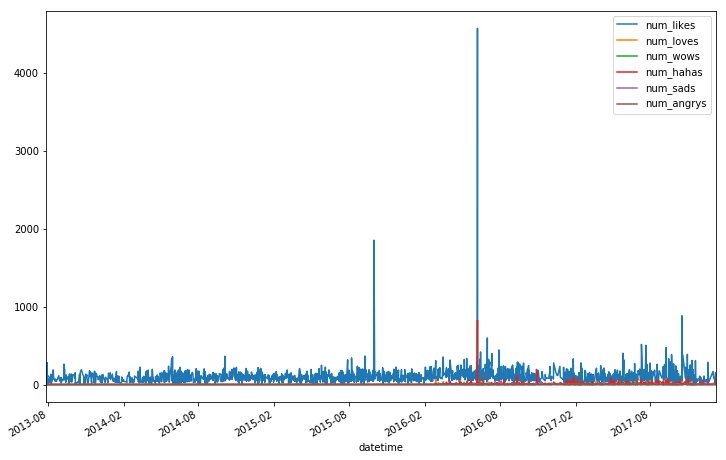

In [9]:
data.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

因為呢2個post會影響之後既分析,忍痛刪掉

In [10]:
data[data['num_likes'] >1500]
data2 = data.drop([973,1384])


再一次睇

由圖所見,一姐係2013之後係越黎越多人識佢,而家reach既人數都開始上升

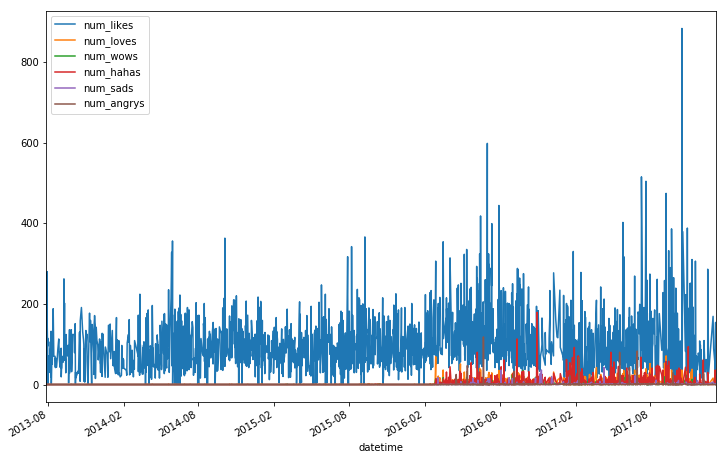

In [11]:
data2.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

# 一姐同fans既互動?

由圖所見一姐係2016年佢越黎越多fans比like,留言都有上升

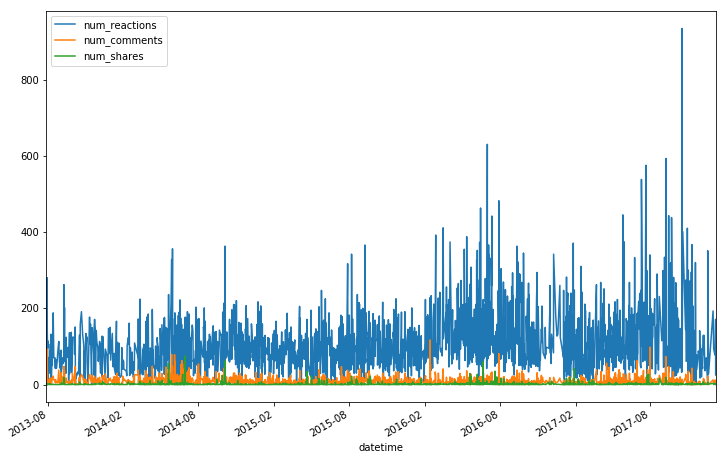

In [12]:
data2.plot(x='datetime', y=['num_reactions', 'num_comments', 'num_shares'],
       figsize=(12,8))

# 出post時間
原來一姐都好勤力去maintain佢個fanpage,佢平均15個鐘就會出一post,抵讚,不槐係一姐

In [13]:
import datetime
delta_datetime = data['datetime'].shift(1) - data['datetime']
delta_datetime_df = pd.Series(delta_datetime).describe().apply(str)
delta_datetime_df = delta_datetime_df.to_frame(name='frequent of posts')
delta_datetime_df

,frequent of posts
count,2603
mean,0 days 14:58:50.763349
std,0 days 18:44:38.707192
min,0 days 00:00:00
25%,0 days 03:11:50.500000
50%,0 days 09:38:32
75%,0 days 20:07:41
max,10 days 22:55:01


In [14]:
def weekday(d):
    list_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'weekday': list_value}).reset_index()
    return df

In [34]:
df_weekday = weekday(dict(data['weekday'].value_counts()))

# 一姐最鐘意係星期幾出post?

答案係星期四,想要軍糧既人,就星期四捕實一姐facebook

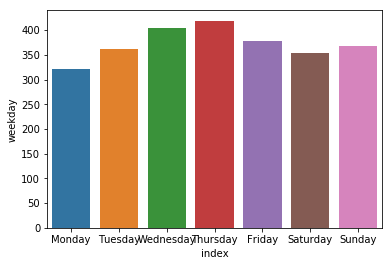

In [16]:
sns.barplot(x='index', y='weekday', data = df_weekday)

除左有次星期四 reaction過800外,之後就到星期五,星期二最多人睇一姐既post

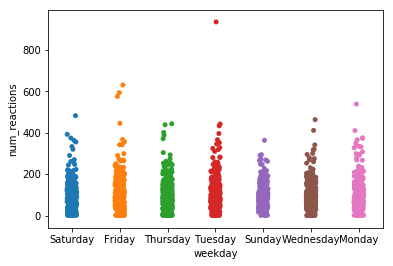

In [17]:
sns.stripplot(x='weekday',y='num_reactions', data = data2, jitter=True)

In [18]:

def hour(d):
    list_key = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'hour': list_value}).reset_index()
    return df

In [22]:
df_hour = hour(dict(data['hour'].value_counts()))

# 一姐平時幾點出post?

一姐似乎最鐘意係深夜出post

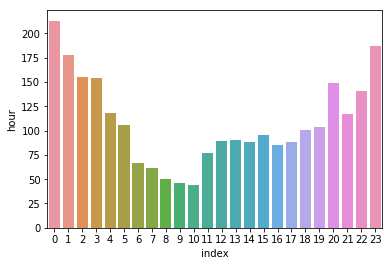

In [23]:
ax = sns.barplot(x='index', y='hour', data = df_hour)

但係最多人睇一姐既post其實係下午12點到晚上18點最多一睇,你要注意返啦

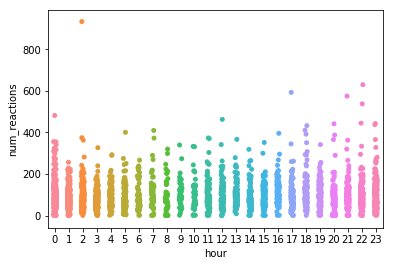

In [24]:
sns.stripplot(x='hour',y='num_reactions', data = data2, jitter=True)

In [25]:
df_status_type = data['status_type'].value_counts().to_frame(name='status_type')
df_status_type

,status_type
photo,2074
video,255
link,166
status,108
event,1


# 究竟一姐派出左幾多軍糧?

一姐總共派出2074次軍糧

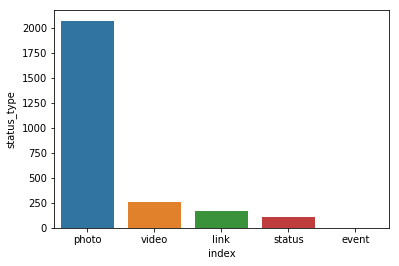

In [26]:
sns.barplot(x='index', y='status_type', data = df_status_type.reset_index())

當然啦,咁多軍糧,自然多人睇啦

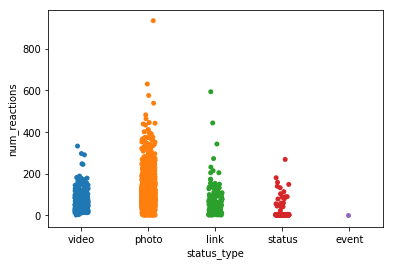

In [27]:
sns.stripplot(x="status_type", y="num_reactions", data=data2, jitter=True)

# 究竟一姐平時d post講d乜

In [28]:
import jieba
import jieba.analyse
import operator
from wordcloud import WordCloud, STOPWORDS

In [29]:
list(data['status_message'])[324]

'喺咁嘅環境下......係要發吓神經！\r\n\r\n#就嚟跌啦杯野 #rooftop #octave #打碟嗰個D歌真係差少少 #我係一個釘SA #未飲已經似飲大咗 #naturalhigh #返房先堅飲 #relaxing'

In [ ]:
for one in jieba.cut(list(data['status_message'])[99]):
    print (one)

In [30]:
jieba.analyse.extract_tags(list(data['status_message'])[99], topK=20)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Tommy\AppData\Local\Temp\jieba.cache
Loading model cost 1.043 seconds.
Prefix dict has been built succesfully.


['已經',
 '盡量',
 '無聊野',
 'hkjc',
 '綠茵',
 '那個',
 'happywednesday',
 'oktoberfest',
 '留意',
 '一刻',
 '啤酒',
 '今晚',
 '精神',
 '集中',
 '自己']

In [31]:
def jieba_extract(message_list):
    word_count = {}
    for message in message_list:
        seg_list = jieba.analyse.extract_tags(message, topK=120)
        for seg in seg_list:
            if not seg in word_count:
                word_count[seg] = 1
            else:
                word_count[seg] += 1

    sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1))
    #sorted_word_count_dict = dict(sorted_word_count)
    sorted_word_count.reverse()
    return sorted_word_count
sorted_word_count = jieba_extract(list(data['status_message']))

In [32]:
sorted_word_count_dict = dict(sorted_word_count)

一姐似乎最鐘意講,朋友,今日,所以,可以,大家,一個,其實,快樂


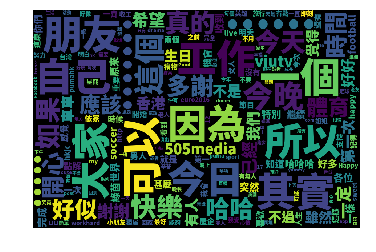

In [33]:
tpath = 'NotoSansCJKtc-Black.otf'
wc = WordCloud(max_font_size=120, relative_scaling=.1,font_path=tpath,width=900, height=600, stopwords=True).fit_words(sorted_word_count_dict)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 200)
plt.show()